In [4]:
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

#plot parameters
font_size=10
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size-1)

#color list
color_list = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8", "#0c2c84"]
color_list2 = ["#2b83ba","#fdae61","#83b692","#d36060","#8E7891"] #["#2b83ba","#d7191c","#fdae61"]

In [5]:
data = json.load(open('dat/email-eu.json','r'))

In [6]:
node_list = sorted([int(node)-1 for node in data['node-data']])

In [7]:
group_list = []
for _,group in data['edge-dict'].items():
    relabeled_group = tuple(sorted([int(node)-1 for node in group]))
    group_list.append(relabeled_group)

In [8]:
group_dict = defaultdict(int)
for group in group_list:
    group_dict[group] += 1

In [9]:
groups = []
weights = []
for group,weight in group_dict.items():
    groups.append(list(group))
    weights.append(weight)

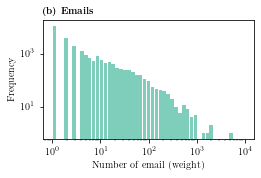

In [10]:
width = 7.057/2.
height = width/1.5
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.15, bottom=0.2, right=0.98,
                    top=0.9, wspace=0.5, hspace=0.6)

plt.hist(weights,bins=np.logspace(0,4),color=color_list[1],rwidth=0.9)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Number of email (weight)')
plt.title(r'\textbf{(b) Emails}',loc='left')
plt.savefig('../figs/frequency_email.pdf')

In [8]:
edge_list = []
for i,group in enumerate(groups):
    for node in group:
        edge_list.append([node,i])

### Save formatted data

In [9]:
form_data = {'node_list':node_list,'edge_list':edge_list,'weights':weights,'groups':groups}

In [10]:
json.dump(form_data,open('./dat/email-eu_form.json','w'))